In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sreedevi prakash\anaconda3

  added / updated specs:
    - seaborn


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> anaconda::conda-4.8.3-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


In [15]:
import os
path = os. getcwd() 
print(path)
my_file = open("DOHMH_Farmers_Markets.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
FM_NYC=pd.read_csv(my_file)


C:\Users\sreedevi prakash\Desktop


In [17]:
FM_NYC.head()

,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"


In [19]:
FM_NYC.rename(columns={'Days of Operation':'Days_operation'}, inplace=True)
print(FM_NYC.Days_operation.unique())

['Wednesday' 'Tuesday' 'Saturday' 'Tuesday & Friday' 'Sunday' 'Friday'
 'Friday & Saturday' 'Thursday & Saturday' 'Tuesday &\nThursday'
 'Wednesday & Sunday' 'Wednesday & Saturday' 'Thursday'
 'Tuesday, Thursday & Saturday'
 'Wednesday, Thursday, Friday, Saturday & Sunday'
 'Wednesday,\nThursday & Friday' 'Tuesday &\nFriday'
 'Wednesday &\nSaturday' 'Thursday & Sunday' 'Monday' 'Tuesday & Thursday'
 'Tuesday &\nSaturday' 'Wednesday & Friday'
 'Monday,\nWednesday,\nFriday & Saturday']


In [22]:
FM_NYC['Days_operation'].value_counts().to_frame()

,Days_operation
Saturday,39
Wednesday,22
Sunday,18
Thursday,16
Friday,11
Tuesday,10
Wednesday & Saturday,4
Tuesday & Friday,3
Wednesday & Sunday,1
Tuesday & Thursday,1


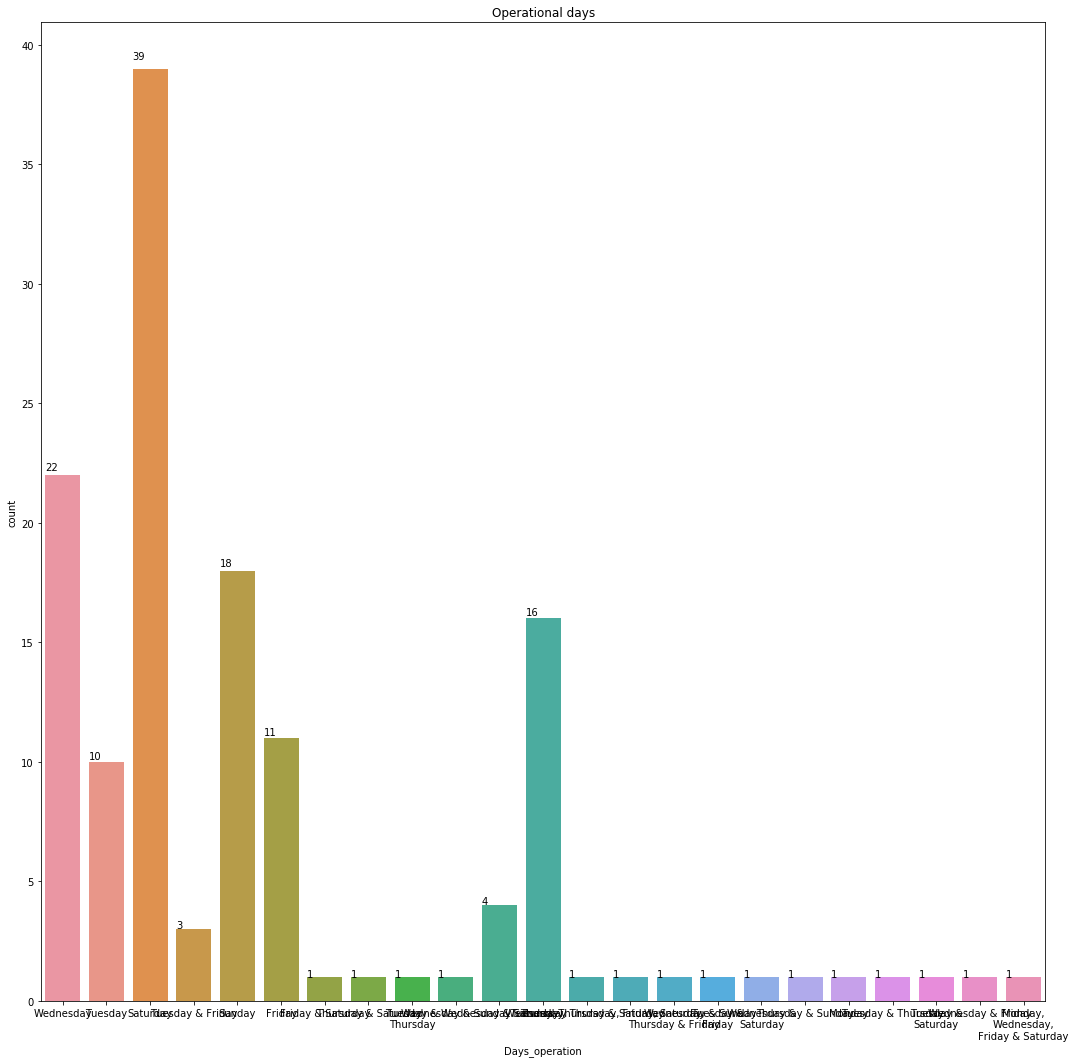

In [26]:
fig,ax = plt.subplots(1, 1, figsize=(18, 18))
sns.countplot(x='Days_operation',data=FM_NYC)
ax.set_title("Operational days")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [23]:
FM_NYC.rename(columns={'Open Year-Round':'Open_year_around'}, inplace=True)
print(FM_NYC.Open_year_around.unique())

['No' 'Yes' 'Yes (W)']


In [24]:
FM_NYC['Open_year_around'].value_counts().to_frame()

,Open_year_around
No,109
Yes,28
Yes (W),1


In [28]:
FM_NYC['Borough'].value_counts().to_frame()

,Borough
Brooklyn,44
Manhattan,41
Bronx,27
Queens,22
Staten Island,4


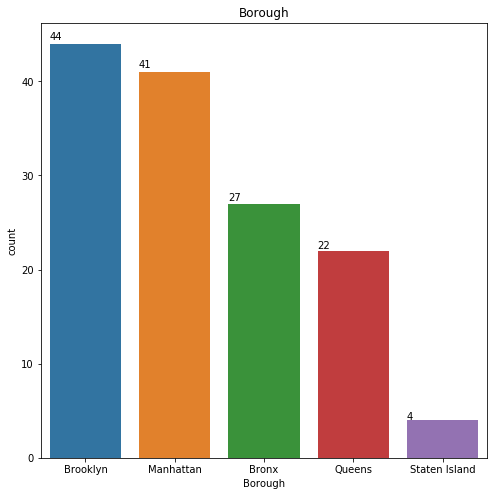

In [31]:
fig,ax = plt.subplots(1, 1, figsize=(8, 8))
sns.countplot(x='Borough',data=FM_NYC)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();